# Trabalho II - Análise de Dados
Ruhan Garatini\
Base de dados: Desempenho Estudantil

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [89]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/DataScience-2025/03_desempenho_estudantil.csv"
df = pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Limpeza de dados

In [90]:
#Remover dados nulos
df.dropna(inplace=True)

# Remover os dados incorretos (nota maior do que 100)
df.drop(df[df.Exam_Score > 100].index, axis=0, inplace = True)

## Algoritmos de Regressão

In [91]:
# Regressão Linear -> Apresentou um ótimo desempenho
# Árvore de Regressão -> Apresentou o pior desempenho, alterar a profundidade da árvore não trouxe alterações significativas nas métricas do modelo
# Random Forest Regressor -> Alterar a profundidade da árvore não trouxe alterações significativas nas métricas do modelo
# SVR -> Aumentar o valor de C resultou em uma leve melhora nas métricas, enquanto epsilon resultou em uma piora significativa

regressao = {
    "Regressão Linear": LinearRegression(),
    "Árvore de Regressão": DecisionTreeRegressor(max_depth=15, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(max_depth=30, random_state=42),
    "SVR": SVR(kernel='rbf', C=2, epsilon=0.1)
}

## Tratamento e Separação Treino e Teste

In [92]:
# Tratamento e separação para os modelos de regressão
# Y = Notas do Exame

encoder = OneHotEncoder()

# Seleciona as colunas não numéricas
columns = df.select_dtypes(exclude=['number']).columns
encoded = encoder.fit_transform(df[columns])

encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(columns), index=df.index)

# Remove as colunas originais e adiciona as codificadas
df_encoded = pd.concat([df.drop(columns=columns), encoded_df], axis=1)

x = df_encoded.drop('Exam_Score', axis= 1)
y = df_encoded['Exam_Score']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Hold-out 70/30
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

df_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,8,59,2,4,61,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,98,7,91,2,4,74,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,8,98,1,4,71,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,6,65,3,4,70,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Regressão

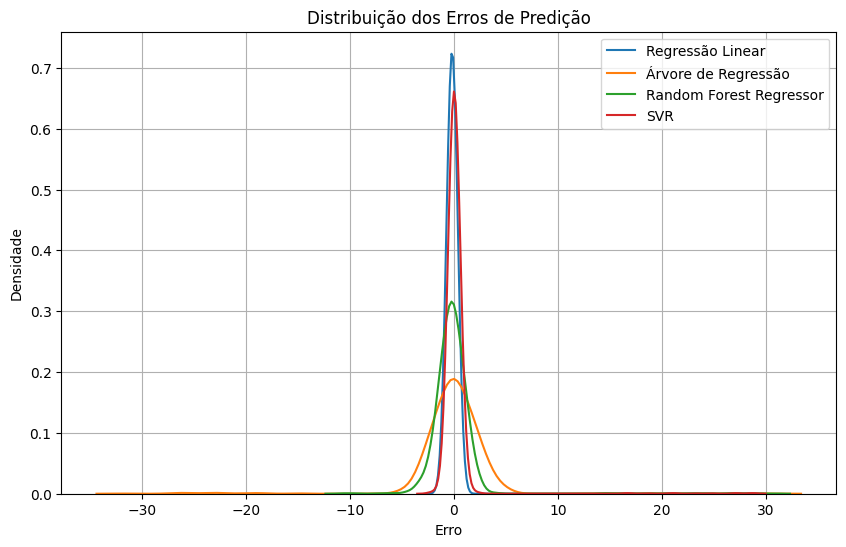

In [93]:
plt.figure(figsize=(10, 6))

for name, model in regressao.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    sns.kdeplot(y_test - y_pred, label=name)

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.show()

## Algoritmos de Classificação

In [94]:
# Regressão Logística -> Mesmo alterando os valores, as métricas do modelo não foram alteradas
# Árvore de Decisão -> Mesmo alterando os valores, as métricas do modelo não foram alteradas
# Random Forest -> Mesmo aumentando significamente a quantidade e o tamanho das árvores, apresentou um desempenho muito ruim
# SVM -> Alterar o valor de C (penalidade) melhorou significativamente as métricas do modelo (F1-Score 0.27 -> 0.68)
# K-NN -> Alterar o número de vizinhos não trouxe melhoras para as métricas do modelo

classificacao = {
    "Regressão Logística": LogisticRegression(max_iter=200, random_state=42),
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42),
    "SVC": SVC(kernel='rbf', C=8),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

## Tratamento e Separação de Treino e Teste

In [95]:
# Tratamento e separação para os modelos de classificação
# Y = Envolvimento dos pais

encoder = OneHotEncoder()
y_encoder = LabelEncoder()

# Seleciona as colunas não numéricas (exceto envolvimento dos pais)
columns = df.drop('Parental_Involvement', axis=1).select_dtypes(exclude=['number']).columns
encoded = encoder.fit_transform(df[columns])

encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(columns), index=df.index)

# Remove as colunas originais e adiciona as codificadas
df_encoded = pd.concat([df.drop(columns=columns), encoded_df], axis=1)

x = df_encoded.drop('Parental_Involvement', axis= 1)
y = df_encoded['Parental_Involvement']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# LabelEncoder para manter os valores em uma única coluna
y_encoded = y_encoder.fit_transform(y)
classes_names = y_encoder.classes_

# Hold-out 70/30
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.3, random_state=42)

df_encoded.head()

,Hours_Studied,Attendance,Parental_Involvement,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Access_to_Resources_High,Access_to_Resources_Low,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,Low,7,73,0,3,67,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19,64,Low,8,59,2,4,61,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24,98,Medium,7,91,2,4,74,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29,89,Low,8,98,1,4,71,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19,92,Medium,6,65,3,4,70,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Classificação


 Regressão Logística
Acurácia : 0.82
Precisão : 0.90
Recall   : 0.77
F1-Score : 0.81


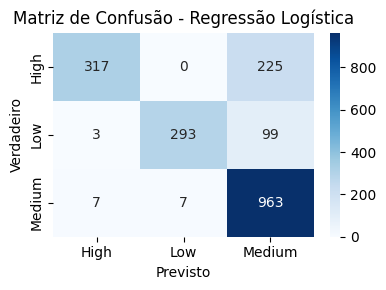


 Árvore de Decisão
Acurácia : 0.43
Precisão : 0.39
Recall   : 0.40
F1-Score : 0.40


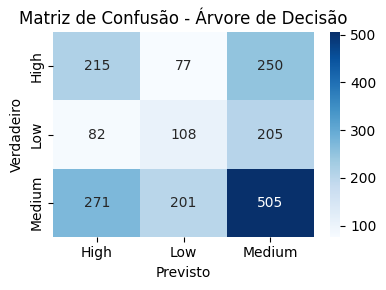


 Random Forest
Acurácia : 0.51
Precisão : 0.34
Recall   : 0.33
F1-Score : 0.23


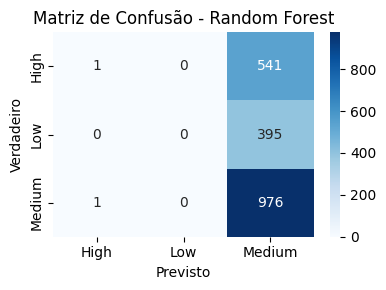


 SVC
Acurácia : 0.71
Precisão : 0.72
Recall   : 0.66
F1-Score : 0.68


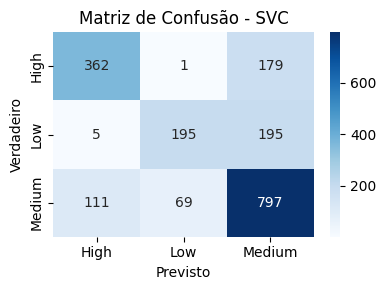


 K-NN
Acurácia : 0.40
Precisão : 0.33
Recall   : 0.33
F1-Score : 0.33


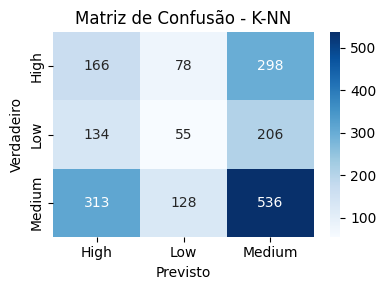

In [96]:
for name, model in classificacao.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n {name}")
    print(f"Acurácia : {acc:.2f}")
    print(f"Precisão : {prec:.2f}")
    print(f"Recall   : {rec:.2f}")
    print(f"F1-Score : {f1:.2f}")

    # Matriz de confusão
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes_names, yticklabels=classes_names)
    plt.title(f'Matriz de Confusão - {name}')
    plt.xlabel("Previsto")
    plt.ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()

## Conclusão
A base contém diversos parâmetros de classificação, dessa forma, foi utilizado o método One Hot Encoder para permitir a análise dos modelos. Além disso, para a classificação, a predição dos envolvimentos dos pais já se trata de uma variável de classes, portanto, foi utilizado o Label Encoder para manter Y em apenas uma coluna.\
\
De modo geral, os modelos de Regressão Linear e SVR apresentaram métricas e um desempenho satisfatório para predição das notas dos exames de acordo com as variáveis disponíveis na base de dados.\
\
Nos modelos de classificação, apenas a Regressão Logística apresentou um bom desempenho, enquanto o SVM apresentou métricas medianas e os demais modelos métricas bem baixas.\
\
No geral, os modelos de árvore tanto de regressão quanto classificação apresentaram métricas baixas, indicando não ser um bom modelo para reconher os padrões dessa base de dados. Além disso, alterar suas hiperparâmetros como a profundidade das árvores não trouxe impacto no seu desempenho.\
\
Além disso, os modelos de SVR e SVC foram os que mais apresentaram impacto nas métricas com a alteração dos hiperparâmetros, sendo possível chegar a melhores resultados ajustando o valor de C (penalidade)\
\
Portanto, é possível dizer a base possui uma distribuição de dados interessante e que podem ser utilizados para predição de algumas variáveis em relação aos alunos, como nos cenários desenvolvimentos nesse trabalho, notas no exame e envolvimento dos pais com um desempenho e acertividade satisfatória.